**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 26 – Deep Computer Vision Using Convolutional Neural Networks**

# Convolutional Layers

Nok Wongpiromsarn, 8 August 2022

**Credit:** The large portion of the code has been taken from https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image

# The pixel intensity for each color channel is
# represented as a byte from 0 to 255.
# Scale it to get floats in [0, 1].
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


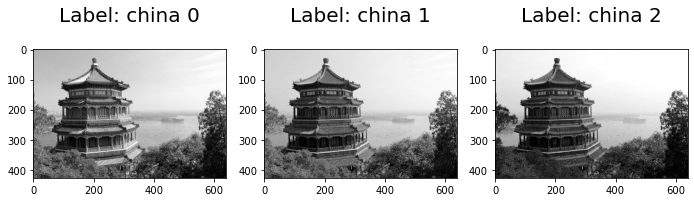

In [2]:
from common_plots import DigitPlotter

plotter = DigitPlotter(china[:,:,0].shape)
plotter.is_binary_cm = False
plotter.plot_multiple([china[:,:,i] for i in range(china.shape[2])], 
                      ["china " + str(i) for i in range(china.shape[2])])

**Create 2 filters, one with a vertical white line in the middle, and the other with a horizontal white line in the middle**

The weights of a convolutional layer are represented as a 4D tensor of shape [$f_h , f_w , f_n′, f_n$] where
- $f_h$ and $f_w$ are the height and width of the receptive field
- $f_n'$ is the number of feature maps in the previous layer
- $f_n$ is the number of feature maps in the current layer

In [3]:
# Create 2 filters with fh = fw = 7.
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

# Vertical line: all the rows in the 4th column has value 1)
filters[:, 3, :, 0] = 1

# Horizontal line: All the columns in the 4th row has value 1
filters[3, :, :, 1] = 1

**Apply the filters to both images**

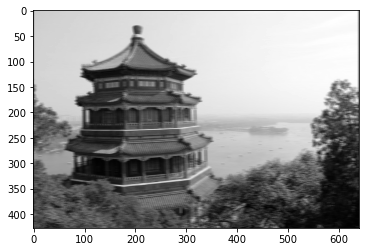

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Apply the filters to both images using the tf.nn.conv2d() function.
# Use zero padding ( padding="SAME" ) and a stride of 1.
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

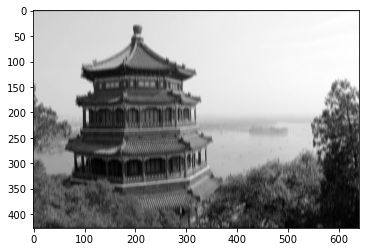

In [5]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.show()